In [3]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
import mplfinance as mpf
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.dates import MonthLocator,MONTHLY
import datetime as dt
import pylab
import time

In [4]:
daytime = time.strftime("%Y.%m.%d", time.localtime()) 
#dfAll = pd.read_csv('industrystock'+daytime+'.csv')
dfAll = pd.read_csv('stock'+daytime+'shK.csv')
#dfAll = pd.read_csv('stock'+daytime+'shK.csv')
dfAll.head()

,日期,开盘价,收盘价,最高价,最低价,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [11]:

dfAll.rename(columns = {
    '日期':'Date',
    '开盘价':'Open',
    '最高价':'High',
    '最低价':'Low',
    '收盘价':'Close',
    '成交量':'Volume'
},inplace=True)
length = len(dfAll)
# for i in range(0, length):
#     d = str(int(dfAll.loc[i][0]))
#     d = d[0:4]+"-"+d[4:6]+"-"+d[6:8]
#     dfAll.loc[i,"Date"]=d
dfAll['Date'] =pd.to_datetime(dfAll['Date'])
dfAll.head()

,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166


In [15]:
#classify = dfAll["行业编号"].unique()
classify = dfAll["股票编号"].unique()
print(classify)
industryid = 688166


[688166 688590 688488 600397 600463 603101 600250 600123 600476 603106
 603337 603958 603176 600866 605398 600706 605319 600847 600756 688173]


In [16]:
#days = dfAll[dfAll["行业编号"].isin([industryid])]
days = dfAll[dfAll["股票编号"].isin([industryid])]
days

,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2019-11-08,27.60,30.44,33.13,26.96,262044,779698602.0,49.20,142.74,17.90,70.89,688166
1,2019-11-11,30.03,32.24,33.33,29.93,151579,483402594.0,11.17,5.91,1.80,41.01,688166
2,2019-11-12,31.43,28.04,31.43,27.89,110284,320441224.0,10.98,-13.03,-4.20,29.83,688166
3,2019-11-13,28.03,28.51,29.11,27.34,63258,180876042.0,6.31,1.68,0.47,17.11,688166
4,2019-11-14,28.03,28.41,30.33,27.69,62991,185045178.0,9.26,-0.35,-0.10,17.04,688166
...,...,...,...,...,...,...,...,...,...,...,...,...
3190243,2022-01-17,33.66,34.28,36.16,33.31,67306,233011668.0,8.46,1.72,0.58,3.19,688166
3190244,2022-01-18,34.50,32.75,34.55,32.70,40082,133509309.0,5.40,-4.46,-1.53,1.90,688166
3190245,2022-01-19,32.90,32.56,33.30,31.92,18415,59833142.0,4.21,-0.58,-0.19,0.87,688166
3190246,2022-01-20,32.79,31.90,33.11,31.83,14413,46394454.0,3.93,-2.03,-0.66,0.68,688166


In [17]:
#df = dfAll[dfAll["行业编号"].isin([industryid])]
df = dfAll[dfAll["股票编号"].isin([industryid])]
df = df.tail(100).reset_index(drop=True)

df


,Date,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,股票编号
0,2021-08-25,34.83,36.70,36.88,34.54,46290,166439239.0,6.89,8.04,2.73,2.56,688166
1,2021-08-26,36.92,34.85,37.43,34.71,26827,95350874.0,7.41,-5.04,-1.85,1.49,688166
2,2021-08-27,34.88,33.85,35.25,33.60,16867,57862713.0,4.73,-2.87,-1.00,0.93,688166
3,2021-08-30,34.20,33.13,34.42,32.95,21025,70517431.0,4.34,-2.13,-0.72,1.16,688166
4,2021-08-31,33.25,33.66,34.34,32.71,22583,75591319.0,4.92,1.60,0.53,1.25,688166
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-17,33.66,34.28,36.16,33.31,67306,233011668.0,8.46,1.72,0.58,3.19,688166
96,2022-01-18,34.50,32.75,34.55,32.70,40082,133509309.0,5.40,-4.46,-1.53,1.90,688166
97,2022-01-19,32.90,32.56,33.30,31.92,18415,59833142.0,4.21,-0.58,-0.19,0.87,688166
98,2022-01-20,32.79,31.90,33.11,31.83,14413,46394454.0,3.93,-2.03,-0.66,0.68,688166


In [18]:
#df.insert(7,"OBV", 0, allow_duplicates=False)
df
df.loc[1,'Close']

34.85

In [19]:
def calOBV(df):
    # 把成交量换算成万手
    df['VolByHand'] = df['Volume']/1000000
    # 创建OBV列，先全填充为0
    df['OBV'] =0
    cnt=1 # 索引从1开始，即从第2天算起
    for i in range(1,len(df)):
        if(df.loc[i,'Close']>df.loc[i-1,'Close']):
            df.loc[i,'OBV'] = df.loc[i-1,'OBV'] + df.loc[i,'VolByHand']
        if(df.loc[i,'Close']<df.loc[i-1,'Close']):           
            df.loc[i,'OBV'] = df.loc[i-1,'OBV'] - df.loc[i,'VolByHand']
        
        
    return df


In [20]:
df = calOBV(df)
df.set_index("Date",inplace=True,drop=False)

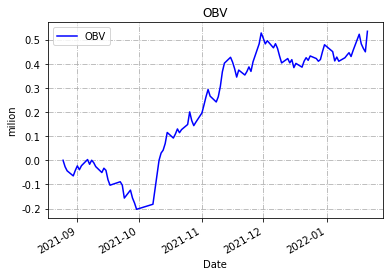

In [24]:
plt.figure()
df['OBV'].plot(color="blue",label='OBV')
plt.legend(loc='best')           # 绘制图例

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel("milion")
plt.title("OBV")     # 设置子图的标题
plt.grid(linestyle='-.')
